In [1]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset
#Around100M+ ratings 4499 movies 480,000 users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Untitled folder/Dataset/combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:

# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [7]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:

netflix_dataset.shape

(24058263, 2)

In [ ]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
netflix_dataset.isnull()

,Cust_Id,Rating
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24058258,False,False
24058259,False,False
24058260,False,False
24058261,False,False


In [ ]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count

475257

In [ ]:
#without NaN values
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [57]:
netflix_dataset['Rating'].nunique() #count of unique value

5

In [58]:
netflix_dataset['Rating'].unique()   # unique values

array([5., 4., 3., 1., 2.])

In [59]:
netflix_dataset['Rating'].value_counts()  #count+name

Rating
4.0    5901368
3.0    5185650
5.0    3769803
2.0    1759281
1.0     721356
Name: count, dtype: int64

In [ ]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


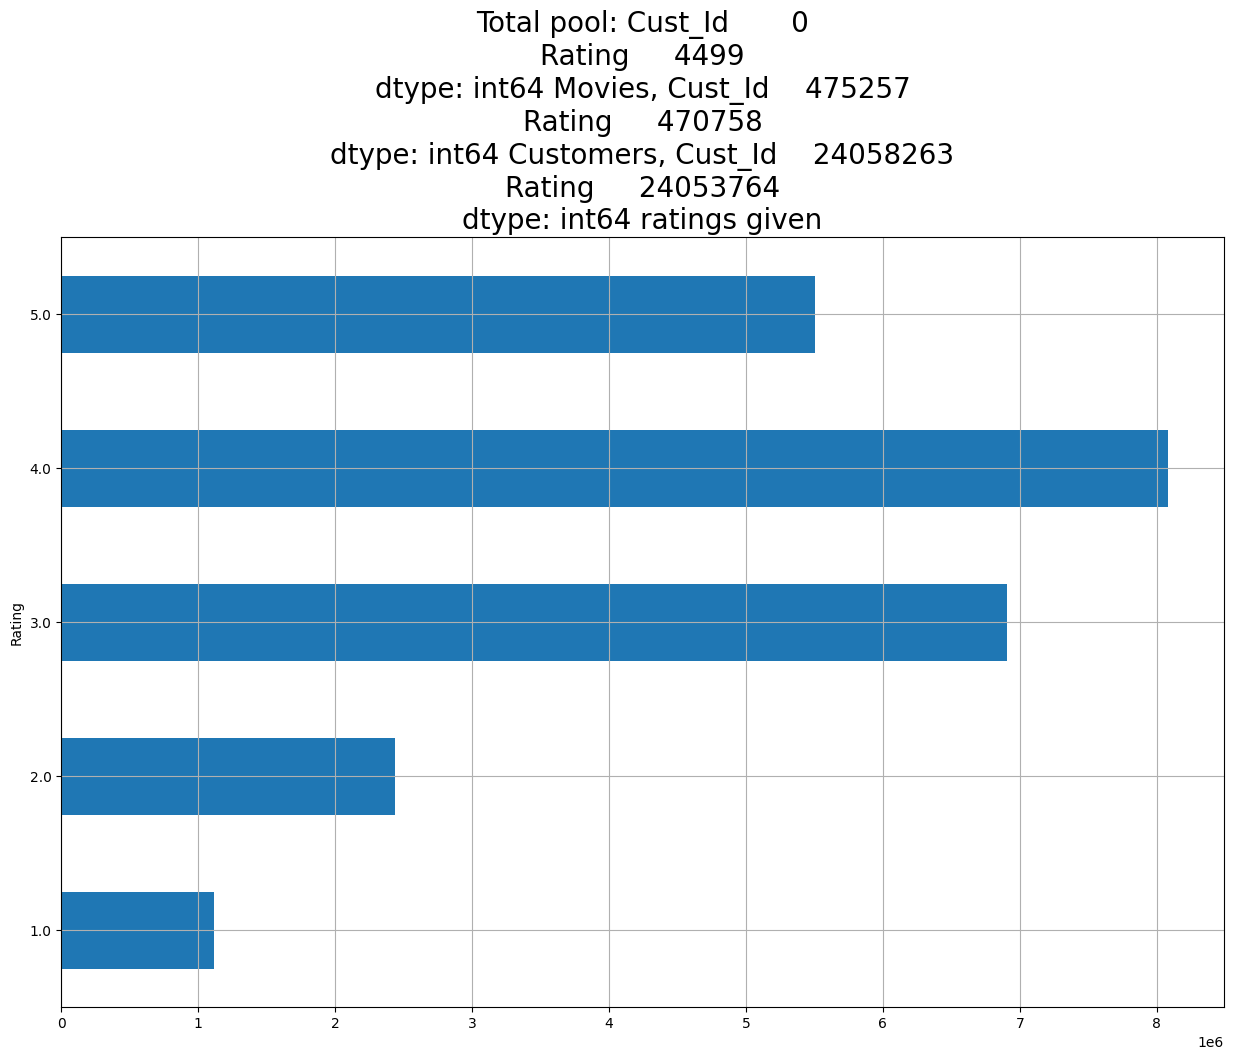

In [ ]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column

df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [ ]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan.shape

(4499, 1)

In [ ]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [ ]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [ ]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [5]:
df = netflix_dataset.copy()

In [6]:
current_movie_id = None
movie_ids = []

for cust_id in df['Cust_Id']:
    if ':' in cust_id:
      current_movie_id = int(cust_id.replace(':', ''))
    movie_ids.append(current_movie_id)


df['movie_Id'] = movie_ids

df = df[df['Rating'].notna()]

In [60]:
movie_ids

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
df.head()

,Cust_Id,Rating,movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [8]:
df.tail()

,Cust_Id,Rating,movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [9]:
df = df.reset_index().drop("index", axis = 1)

In [10]:
df

,Cust_Id,Rating,movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1
...,...,...,...
24053759,2591364,2.0,4499
24053760,1791000,2.0,4499
24053761,512536,5.0,4499
24053762,988963,3.0,4499


In [11]:
df.head()

,Cust_Id,Rating,movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


In [12]:
netflix_dataset=df

In [13]:
netflix_dataset.head()

,Cust_Id,Rating,movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


In [14]:
netflix_dataset.tail()

,Cust_Id,Rating,movie_Id
24053759,2591364,2.0,4499
24053760,1791000,2.0,4499
24053761,512536,5.0,4499
24053762,988963,3.0,4499
24053763,1704416,3.0,4499


In [15]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [16]:
dataset_movie_summary=netflix_dataset.groupby('movie_Id').agg(f)

In [17]:
dataset_movie_summary

Cust_Id      Rating          
           count mean  count      mean
movie_Id                              
1            547  inf    547  3.749543
2            145  inf    145  3.558621
3           2012  inf   2012  3.641153
4            142  inf    142  2.739437
5           1140  inf   1140  3.919298
...          ...  ...    ...       ...
4495         614  inf    614  3.478827
4496        9519  inf   9519  3.763000
4497         714  inf    714  2.715686
4498         269  inf    269  2.464684
4499         428  inf    428  2.614486

[4499 rows x 4 columns]

In [18]:
dataset_movie_summary=netflix_dataset.groupby('movie_Id')['Rating'].agg(f)

In [19]:
dataset_movie_summary

,count,mean
movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [20]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [21]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [22]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7))
movie_benchmark

1799

In [23]:
dataset_movie_summary['count']

movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [24]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_Id', length=3149)

In [25]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
10,49,3.346939
1000004,1,5.000000
1000027,30,4.300000
1000033,101,3.316832
1000035,20,4.400000
...,...,...
999964,48,4.062500
999972,35,4.057143
999977,14,3.714286


In [26]:
# dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [27]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [28]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

In [29]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [30]:
netflix_dataset=netflix_dataset[~netflix_dataset['movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [31]:
netflix_dataset.head()


,Cust_Id,Rating,movie_Id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


In [37]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
# df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
# print(df_p.shape)



### Understanding Singular Value Decomposition (SVD)

**Singular Value Decomposition (SVD)** is a powerful mathematical technique used in various fields, including recommendation systems. It decomposes a matrix into three other matrices, capturing essential patterns in the data. In the context of recommendation systems, SVD can help in identifying latent factors that describe both items and users.

### The Mathematics Behind SVD

Given a matrix \( A \), SVD decomposes it into three matrices:

\[ A = U \Sigma V^T \]

- **\( U \)**: An \( m \times n \) orthogonal matrix where \( m \) is the number of users.
- **\( \Sigma \)**: An \( n \times n \) diagonal matrix of singular values.
- **\( V^T \)**: An \( n \times n \) orthogonal matrix where \( n \) is the number of items.

In recommendation systems, the matrix \( A \) often represents user-item interactions, such as ratings.

### How SVD Works in Recommendation Systems

1. **Data Representation**:
   - Create a user-item interaction matrix \( R \), where rows represent users, columns represent items, and the values represent ratings.

2. **Decomposition**:
   - Decompose the matrix \( R \) using SVD to get \( U \), \( \Sigma \), and \( V^T \).

3. **Dimensionality Reduction**:
   - Reduce the dimensions by keeping the top \( k \) singular values. This reduction helps in capturing the most significant features while eliminating noise.

4. **Reconstruction**:
   - Approximate the original matrix \( R \) by multiplying the reduced matrices: \( R \approx U_k \Sigma_k V_k^T \).

5. **Prediction**:
   - Use the approximated matrix to predict missing values, i.e., ratings that users might give to items they haven't rated yet.

### Example

Consider a simple example with 4 users and 5 movies:

|     | M1 | M2 | M3 | M4 | M5 |
|-----|----|----|----|----|----|
| U1  | 5  | 3  | 0  | 1  | 4  |
| U2  | 4  | 0  | 2  | 1  | 3  |
| U3  | 1  | 1  | 0  | 5  | 2  |
| U4  | 0  | 0  | 5  | 4  | 0  |

1. **Matrix Decomposition**:

   Apply SVD to decompose the matrix \( R \):

   \[ R = U \Sigma V^T \]

   The resulting matrices \( U \), \( \Sigma \), and \( V^T \) might look like this:

   \[ U = \begin{bmatrix}
   u_{11} & u_{12} & u_{13} & u_{14} \\
   u_{21} & u_{22} & u_{23} & u_{24} \\
   u_{31} & u_{32} & u_{33} & u_{34} \\
   u_{41} & u_{42} & u_{43} & u_{44}
   \end{bmatrix}, \quad \Sigma = \begin{bmatrix}
   \sigma_1 & 0 & 0 & 0 & 0 \\
   0 & \sigma_2 & 0 & 0 & 0 \\
   0 & 0 & \sigma_3 & 0 & 0 \\
   0 & 0 & 0 & \sigma_4 & 0
   \end{bmatrix}, \quad V^T = \begin{bmatrix}
   v_{11} & v_{12} & v_{13} & v_{14} & v_{15} \\
   v_{21} & v_{22} & v_{23} & v_{24} & v_{25} \\
   v_{31} & v_{32} & v_{33} & v_{34} & v_{35} \\
   v_{41} & v_{42} & v_{43} & v_{44} & v_{45}
   \end{bmatrix} \]

2. **Dimensionality Reduction**:

   Suppose we reduce the dimensionality to 2 (i.e., keep the top 2 singular values):

   \[ U_k = \begin{bmatrix}
   u_{11} & u_{12} \\
   u_{21} & u_{22} \\
   u_{31} & u_{32} \\
   u_{41} & u_{42}
   \end{bmatrix}, \quad \Sigma_k = \begin{bmatrix}
   \sigma_1 & 0 \\
   0 & \sigma_2
   \end{bmatrix}, \quad V_k^T = \begin{bmatrix}
   v_{11} & v_{12} & v_{13} & v_{14} & v_{15} \\
   v_{21} & v_{22} & v_{23} & v_{24} & v_{25}
   \end{bmatrix} \]

3. **Reconstruction**:

   Approximate the original matrix \( R \):

   \[ R' = U_k \Sigma_k V_k^T \]

   This gives us an approximated user-item interaction matrix.

4. **Prediction**:

   Use the approximated matrix \( R' \) to predict missing ratings. For instance, if User 1 hasn't rated Movie 3, the predicted rating can be taken from \( R' \).

### Application in Recommendation Systems

By using SVD, we can:
- Identify latent factors representing user preferences and item characteristics.
- Predict user ratings for items they haven't rated yet.
- Provide personalized recommendations based on these predictions.

For example, in a movie recommendation system:
- **Latent factors** could be genres, actors, or directors.
- **User factors** from matrix \( U \) capture preferences towards these latent factors.
- **Item factors** from matrix \( V \) capture the extent to which items (movies) possess these latent factors.

### Summary

SVD helps in breaking down a complex user-item interaction matrix into simpler matrices that reveal hidden patterns. This decomposition aids in making accurate predictions and providing personalized recommendations, making it a crucial technique in the realm of recommendation systems.

In [32]:
import pandas as pd

In [35]:
df_title = pd.read_csv("/content/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

#load the dat

#eda

#set the benchmark

# new data is also there

In [36]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [37]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357237 sha256=ee58757015b647a5ebf2f9ff7a3b68342e52ddc0377c8e78d45fc37cdaa4b7ff
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [38]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [39]:
#!pip install scikit-surprise

In [40]:
#help us to read the dataset for svd algo
reader=Reader()

In [41]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','movie_Id','Rating']][:100000], reader)

SVD-Matrix factorization

In [42]:
svd=SVD()  #singlar value decomposition
cross_validate(svd, data, measures=['RMSE','MAE'],verbose=True)
#for 1st fold- 1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9942  0.9942  1.0015  0.9940  1.0018  0.9972  0.0037  
MAE (testset)     0.7950  0.7947  0.7996  0.7989  0.8009  0.7978  0.0025  
Fit time          1.41    1.40    1.36    1.46    1.50    1.43    0.05    
Test time         0.16    0.30    0.35    0.12    0.09    0.20    0.10    


{'test_rmse': array([0.99423118, 0.9942256 , 1.00151041, 0.994007  , 1.0018103 ]),
 'test_mae': array([0.7949508 , 0.79472552, 0.79957441, 0.79894606, 0.80088373]),
 'fit_time': (1.412013053894043,
  1.3967857360839844,
  1.3593730926513672,
  1.4585785865783691,
  1.5006704330444336),
 'test_time': (0.1647493839263916,
  0.29822301864624023,
  0.3464221954345703,
  0.12062931060791016,
  0.09176445007324219)}

In [43]:
netflix_dataset.head()

,Cust_Id,Rating,movie_Id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


In [44]:
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]

dataset_712664

,Cust_Id,Rating,movie_Id


In [45]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [46]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [47]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [49]:
user_712664=user_712664[user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
...,...,...,...
4493,4494,1997.0,Cartoon Crazys: Vol. 1
4494,4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,4497,1990.0,Texasville
4497,4498,2000.0,Gonin


In [52]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-52-42d8450a9196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


optional code

In [50]:
# Define a function to predict the estimate score
def predict_score(movie_id):
    return svd.predict(712664, movie_id).est

# Apply the prediction function to the 'Movie_Id' column and drop the column afterwards
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(predict_score)
user_712664.drop(columns='Movie_Id', inplace=True)


In [51]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

        Year                                            Name  Estimate_Score
4468  2002.0                                    Demon Slayer        3.607038
4469  2004.0                        Blue's Clues: Blue Talks        3.607038
4470  1997.0                        If I Never See You Again        3.607038
4472  2002.0                            Kermit's Swamp Years        3.607038
4474  1993.0                     The Best of Beakman's World        3.607038
...      ...                                             ...             ...
4494  2002.0  Clifford: Happy Birthday Clifford / Puppy Love        3.607038
4496  1990.0                                      Texasville        3.607038
4497  2000.0                                           Gonin        3.607038
4498  2002.0                                      In My Skin        3.607038
0     2003.0                                 Dinosaur Planet        3.607038

[3149 rows x 3 columns]


In [54]:
# user_712664.head(10)

In [52]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

        Year                                Name  Estimate_Score
0     2003.0                     Dinosaur Planet        3.607038
4468  2002.0                        Demon Slayer        3.607038
4469  2004.0            Blue's Clues: Blue Talks        3.607038
4470  1997.0            If I Never See You Again        3.607038
4472  2002.0                Kermit's Swamp Years        3.607038
4474  1993.0         The Best of Beakman's World        3.607038
4475  1997.0  VeggieTales: The Star of Christmas        3.607038
4476  1934.0           A Story of Floating Weeds        3.607038
4479  2002.0        Bonnaroo Music Festival 2002        3.607038
4457  2002.0     Terror / Little Shop of Horrors        3.607038


In [53]:
user_712664

,Year,Name,Estimate_Score
0,2003.0,Dinosaur Planet,3.607038
4468,2002.0,Demon Slayer,3.607038
4469,2004.0,Blue's Clues: Blue Talks,3.607038
4470,1997.0,If I Never See You Again,3.607038
4472,2002.0,Kermit's Swamp Years,3.607038
...,...,...,...
4447,1952.0,Ivanhoe,3.607038
4448,2002.0,The Inspector Lynley Mysteries: For the Sake o...,3.607038
4450,2004.0,The Big Black Comedy Show: Vol. 1,3.607038
4451,2001.0,Shot in the Heart,3.607038
